In [1]:
import time
now = time.time()

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_dataset = pd.read_csv('DataSets/DatasetsCreated/train_dataset.csv')
train_dataset.shape

(1015389, 85)

In [4]:
test_dataset = pd.read_csv('DataSets/DatasetsCreated/test_dataset.csv')
test_dataset.shape

(113640, 81)

In [5]:
test_dataset = test_dataset.replace([np.inf, -np.inf], 0)
test_dataset.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Discount,Original_price,Discounted_price,Rate,...,CouponReleasesTime,CouponRedeemTime,CouponRatioTime,MerchantUserReleasesTime,MerchantUserRedeemTime,MerchantUserRatioTime,FirstTimeUser,FirstTimeMerchant,FirstTimeMerchantUser,FirstTimeCouponUser
0,4129537,450,9983,"[30, 5, 0.833]",1.0,2016-07-12,30:5,30,5,0.833,...,0,0,0.000000,1,0,0.0,0,1,0,0
1,6949378,1300,3429,"[30, 5, 0.833]",NaN,2016-07-06,30:5,30,5,0.833,...,0,0,0.000000,0,0,0.0,1,1,0,0
2,2166529,7113,6928,"[200, 20, 0.9]",5.0,2016-07-27,200:20,200,20,0.900,...,50,9,0.180000,0,0,0.0,1,1,0,0
3,2166529,7113,1808,"[100, 10, 0.9]",5.0,2016-07-27,100:10,100,10,0.900,...,50,27,0.540000,0,0,0.0,1,1,0,0
4,6172162,7605,6500,"[30, 1, 0.967]",2.0,2016-07-08,30:1,30,1,0.967,...,7,8,1.142857,0,0,0.0,1,1,0,0


In [6]:
type(test_dataset['Original_price'][1])

numpy.int64

## Categorical Data

In [7]:
# categorical_features = ['Tag', 'Purchaser', 'Merchant_Popular']
# for feature in categorical_features:
#     train_dataset[feature] = pd.Categorical(train_dataset[feature])

# One Hot Encoding
# train_dataset = pd.concat([train_dataset,pd.get_dummies(train_dataset['Tag'], prefix='Tag',prefix_sep='_', drop_first=True,dummy_na=False)],axis=1)
# train_dataset = pd.concat([train_dataset,pd.get_dummies(train_dataset['DayOfWeek'], prefix='DayOfWeek',prefix_sep='_', drop_first=True,dummy_na=False)],axis=1)


In [8]:
train_dataset.columns

Index(['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate', 'Distance',
       'Date_received', 'Date', 'Count', 'Discount', 'Original_price',
       'Discounted_price', 'Rate', 'Tag', 'User_Released', 'User_Redeemed',
       'User_Ratio', 'User_Buys', 'Purchaser', 'UserMerchantCount', 'DayList',
       'UserReleaseList', 'UserRedeemList', 'User_Redeemed_Buy',
       'Merchant_Redeemed', 'Merchant_Ratio', 'Merchant_AvgDistance',
       'Merchant_Popular', 'Merchant_AvgRate', 'AvgDailyUsers',
       'MerchantBuyList', 'MerchantReleaseList', 'MerchantRedeemList',
       'UniqueUsersCount', 'Merchant_Buys', 'Merchant_Redeemed_Buy',
       'Coupon_Released', 'Coupon_Redeemed', 'Coupon_Ratio', 'Duration',
       'CouponRedeemList', 'CouponReleaseList', 'ReleasesCount', 'ImpDay',
       'Weekend', 'DayOfWeek', 'Visits', 'User_Merchant_Ratio',
       'User_Coupon_Redeemed', 'User_Coupon_Ratio', 'Discounted_Redeemed',
       'User_discount_Ratio', 'Merchant_User_Visit', 'Coupon_User_Visit',

## Final Features

In [9]:
remove_columns = ['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate','Discount','Date_received',
                  'Date','Count','RedemptionDuration','DayList','DateTrack','DayNum','First_day',
                  'MerchantBuyList','MerchantReleaseList', 'Merchant_User_Visit', 'MerchantRedeemList',
                  'User_Coupon_Redeemed', 'User_Coupon_Ratio','User_discount_Ratio','Discounted_Redeemed',
                  'Coupon_User_Visit','UserReleaseList','UserRedeemList','CouponRedeemList','CouponReleaseList',
                 'MerchantUserReleaseList','MerchantUserRedeemList']
#                   ,'User_Merchant_Ratio']
unimportant_features = ['DayOfWeek','Weekend','ImpDay','Merchant_Popular','Purchaser']
time_based = ['UserBuysTime','UserRedeemTime','UserReleasesTime','LastMerchantRedemption',
             'LastMerchantUserVisit','LastCouponUserVisit','LastRedemption','LastMerchantVisit','LastUserVisit'
             'UserRedeemedBuyRatioTime','UserRatioTime','MerchantRedeemTime','MerchanReleasesTime',
             'MerchantBuysTime','MerchantRatioTime','MerchantRedeemedBuyRatioTime',
              'CouponRedeemTime','CouponReleaseTime','CouponRatioTime','MerchantUserReleaseTime',
             'MerchantUserRedeemTime','MerchantUserRatioTime']
features = list(set(train_dataset.columns)-set(remove_columns)-set(['Target'])-set(unimportant_features))
print('Features to be included:'+str(len(features)))                  
print(features)

Features to be included:51
['Distance', 'Tag', 'Merchant_AvgRate', 'UserRedeemTime', 'Discounted_price', 'CouponRatioTime', 'Visits', 'FirstTimeCouponUser', 'MerchantRedeemedBuyRatioTime', 'User_Redeemed', 'Merchant_Ratio', 'UserMerchantCount', 'AvgDailyUsers', 'FirstTimeUser', 'Coupon_Released', 'CouponReleasesTime', 'UserReleasesTime', 'Rate', 'CouponRedeemTime', 'User_Ratio', 'Duration', 'Merchant_Redeemed', 'Merchant_AvgDistance', 'UserBuysTime', 'User_Buys', 'MerchantRedeemTime', 'MerchantUserRatioTime', 'FirstTimeMerchantUser', 'LastCouponUserVisit', 'User_Redeemed_Buy', 'Coupon_Ratio', 'Merchant_Buys', 'LastMerchantUserVisit', 'MerchantRatioTime', 'ReleasesCount', 'FirstTimeMerchant', 'LastMerchantVisit', 'UserRedeemedBuyRatioTime', 'User_Released', 'MerchantUserRedeemTime', 'UniqueUsersCount', 'MerchantUserReleasesTime', 'LastMerchantRedemption', 'UserRatioTime', 'Merchant_Redeemed_Buy', 'Coupon_Redeemed', 'LastUserVisit', 'Original_price', 'User_Merchant_Ratio', 'MerchantBuysT

## Positive and Negative classes distribution

0    953236
1     62153
Name: Target, dtype: int64


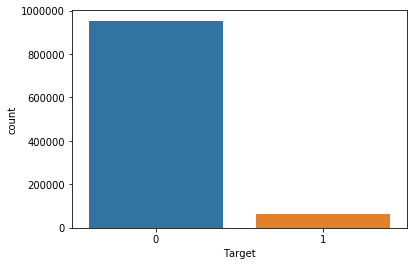

In [10]:
ax = sns.countplot(x='Target', data=train_dataset)
print(train_dataset['Target'].value_counts())

# Model

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import precision_score,recall_score
from sklearn.model_selection import GridSearchCV
# from imblearn.over_sampling import SMOTE

In [12]:
def save_model(model):
    #saving model
    from sklearn.externals import joblib 

    # Save the model as a pickle in a file 
    joblib.dump(model, 'Model/xgboost.pkl') 

    # Load the model from the file 
    clf_saved= joblib.load('Model/xgboost.pkl')  


In [13]:
y = list(train_dataset['Target'])
X = train_dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.175)

### XGBoost

In [14]:
# params = {
#         'min_child_weight': [5],                       #[1,2,3,4,5],
#         'gamma': [1],                                  #[0,0.5, 1, 1.5, 2, 5],
#         'subsample': [0.8],                              #[0.6, 0.8,1.0],
#         'colsample_bytree': [0.8],                       #[0.6, 0.8,1.0],
#         'max_depth': [5],                                #[3,4,5],
#         'learning_rate': [0.1],                          #[0.01,0.05,0.1,0.5],
#         'scale_pos_weight': [1],                         #[1],                 
#         'alpha': [0.2]                                   #[0.1,0.2,0.3,0.4,0.5]
#         }

clf = XGBClassifier(
     n_estimators=500,
     objective= 'binary:logistic',
     nthread=3,
     scale_pos_weight=1,
     seed=410,
     alpha=0.2,
     colsample_bytree=0.8,
     gamma=1,
     learning_rate=0.1,
     max_depth=5,
     min_child_weight=5,
     subsample=0.8)


## Method 1: Class Weight (Balancing)

In [15]:
# weights = np.linspace(0.05, 0.95, 5)
# gsc = GridSearchCV(
#     estimator=clf,
#     param_grid={
#         'class_weight': [{0: x, 1: 1.0-x} for x in weights]
#     },
#     scoring='f1',
#     cv=5
# )
# grid_result = gsc.fit(X_train[features][:1000], y_train[:1000])
# print("Best parameters : %s" % grid_result.best_params_)


## Method 2: SMOTE 

In [16]:
# weights = np.linspace(0.005, 0.25, 5)

# gsc = GridSearchCV(
#     estimator=clf,
#     param_grid={
#         'smote__ratio': weights
#     },
#     scoring='f1',
#     cv=3
# )
# grid_result = gsc.fit(X_train[features][:100000], y_train[:100000])

# print("Best parameters : %s" % grid_result.best_params_)

In [17]:
def train_model():

    clf = XGBClassifier(
     n_estimators=500,
     objective= 'binary:logistic',
     nthread=3,
     scale_pos_weight=1,
     seed=410,
     alpha=0.2,
     colsample_bytree=0.8,
     gamma=1,
     learning_rate=0.1,
     max_depth=5,
     min_child_weight=5,
     subsample=0.8,
    smote__ratio=0.005,
    class_weight={0: 0.05, 1: 0.95})
    
    model = clf.fit(X_train[features], y_train)
#     save_model(model)
    
    ax = plot_importance(model)
    fig = ax.figure
    fig.set_size_inches(15, 9)
    plt.show()

    return model


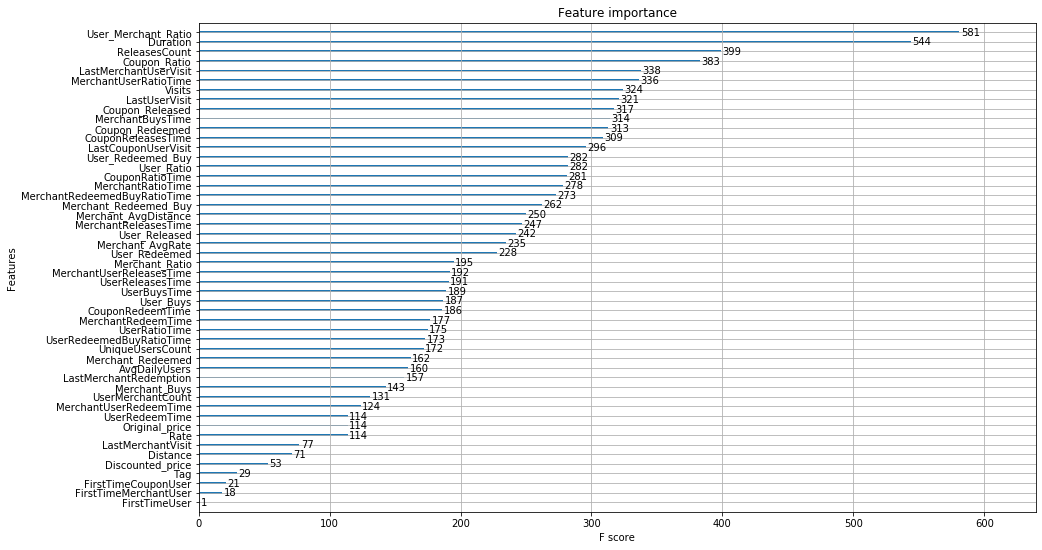

In [18]:
model = train_model()

In [19]:
# feature_importances = pd.DataFrame(model.feature_importances_,index = features,columns=['importance']).sort_values('importance',ascending=True)
# feature_importances.plot(kind='barh',figsize=(10,20))

In [20]:
def evaluate_model(X_check, y_check):
    
    
    predictions = (model.predict_proba(X_check[features])[:,1]).tolist()
    predicted_values = (model.predict(X_check[features])).tolist()
    dataset = X_check.copy()
    dataset['Probability'] = [round(i, 6) for i in predictions]
    output = dataset[['User_id','Merchant_id','Date_received','Probability']]
    
    

    roc_score = round(roc_auc_score(y_check, predictions), 3)

    print('ROC AUC Score of Probailities:  '+ str(roc_score))
    print('ROC AUC Curve')
    fpr, tpr, _ = metrics.roc_curve(y_check, predictions)
    auc = metrics.roc_auc_score(y_check, predictions)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    predicted_values = [1 if x>0.5 else 0 for x in predictions]
    print('______________________________________________________________________')
    print('\n The classification report for the model:')
    print(classification_report(y_check, predicted_values) )
    
    results = confusion_matrix(y_check, predicted_values) 
    print('______________________________________________________________________')
    print('\n The confusion matrix for the model:')
    print(results)
    print('______________________________________________________________________')
    
#     threshold = np.arange(0,1,0.001)
#     precision = np.zeros(len(threshold))
#     recall = np.zeros(len(threshold))
#     for i in range(len(threshold)):
#         y1 = np.zeros(len(y_check),dtype=int)
#         y1 = np.where(predictions<=threshold[i],0,1)
#         precision[i] = precision_score(y_check,y1)
#         recall[i] = recall_score(y_check,y1)

#     plt.figure(figsize=(12,9))
#     sns.set_style('whitegrid')
#     sns.lineplot(x=threshold,y=precision)
#     sns.lineplot(x=threshold,y=recall)
#     plt.xlabel('Threshold')
#     plt.title('Recall and Precision Values Vs Threshhold values')
#     plt.show()
    
    return output, dataset
    

## Validation Data Scores

ROC AUC Score of Probailities:  0.995
ROC AUC Curve


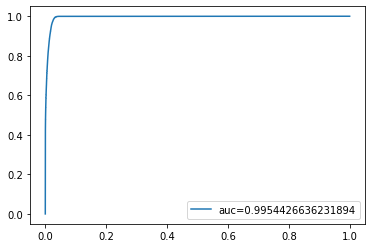

______________________________________________________________________

 The classification report for the model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    141782
           1       0.82      0.87      0.84      9257

    accuracy                           0.98    151039
   macro avg       0.91      0.93      0.92    151039
weighted avg       0.98      0.98      0.98    151039

______________________________________________________________________

 The confusion matrix for the model:
[[139997   1785]
 [  1199   8058]]
______________________________________________________________________


,User_id,Merchant_id,Date_received,Probability
895604,6494150,8188,2016-03-07,0.000005
703564,5109336,450,2016-02-04,0.000002
370081,2693644,4660,2016-01-26,0.000002
800919,5811878,3381,2016-01-28,0.000002
457023,3320855,7422,2016-04-05,0.000001


In [21]:
val_output, val_data = evaluate_model(X_val, y_val)
val_output.head()

### Analysing Validation Data results

In [22]:
correct = val_data[((val_data['Target']==0)&(val_data['Probability']<0.5)) |
                   ((val_data['Target']==1)&(val_data['Probability']>=0.5))]
correct.shape

(148055, 86)

In [23]:
correct[['FirstTimeUser','FirstTimeMerchant', 'FirstTimeMerchantUser',
       'FirstTimeCouponUser']].describe()

,FirstTimeUser,FirstTimeMerchant,FirstTimeMerchantUser,FirstTimeCouponUser
count,148055.000000,148055.000000,148055.000000,148055.000000
mean,0.449846,0.993894,0.162852,0.050191
std,0.497480,0.077901,0.369232,0.218339
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [24]:
incorrect = val_data[((val_data['Target']==0)&(val_data['Probability']>=0.5)) |
                   ((val_data['Target']==1)&(val_data['Probability']<0.5))]
incorrect.shape

(2984, 86)

In [25]:
incorrect[['FirstTimeUser','FirstTimeMerchant', 'FirstTimeMerchantUser',
       'FirstTimeCouponUser']].describe()

,FirstTimeUser,FirstTimeMerchant,FirstTimeMerchantUser,FirstTimeCouponUser
count,2984.000000,2984.000000,2984.000000,2984.000000
mean,0.730228,0.993298,0.547587,0.255027
std,0.443916,0.081607,0.497814,0.435949
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


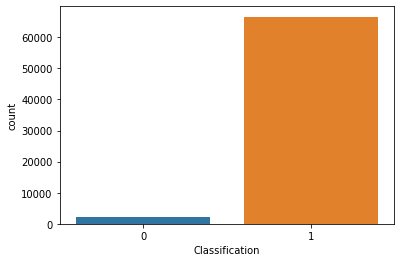

In [26]:
firsttimeuser_1 = val_data[val_data['FirstTimeUser']==1]
firsttimeuser_1['Predicted_values']=[1 if x>=0.5 else 0 for x in firsttimeuser_1['Probability']]
firsttimeuser_1['Classification'] = [1 if x==y else 0 for x,y in 
                                     zip(firsttimeuser_1['Predicted_values'],firsttimeuser_1['Target'])]
sns.countplot(firsttimeuser_1['Classification'])

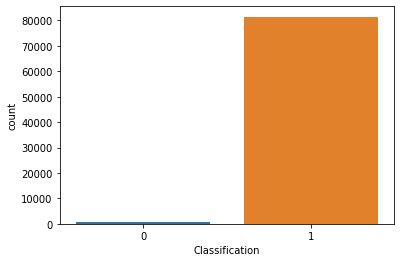

In [27]:
firsttimeuser_0 = val_data[val_data['FirstTimeUser']==0]
firsttimeuser_0['Predicted_values']=[1 if x>=0.5 else 0 for x in firsttimeuser_0['Probability']]
firsttimeuser_0['Classification'] = [1 if x==y else 0 for x,y in 
                                     zip(firsttimeuser_0['Predicted_values'],firsttimeuser_0['Target'])]
sns.countplot(firsttimeuser_0['Classification'])

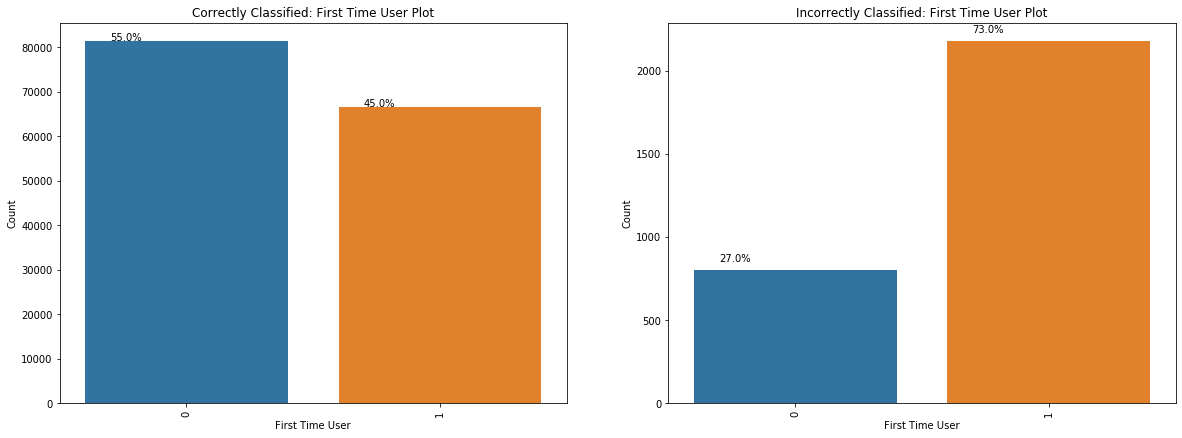

In [28]:
#First time user 
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
plt.subplot(121)
ax1 = sns.countplot(correct['FirstTimeUser'])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
total = len(correct['FirstTimeUser'])
for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x()+0.1, p.get_height()+50))

plt.xlabel('First Time User')
plt.ylabel('Count')
plt.title('Correctly Classified: First Time User Plot')

plt.subplot(122)

ax2 = sns.countplot(incorrect['FirstTimeUser'])
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
total = len(incorrect['FirstTimeUser'])
for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x()+0.1, p.get_height()+50))
        
plt.xlabel('First Time User')
plt.ylabel('Count')
plt.title('Incorrectly Classified: First Time User Plot')

plt.show()

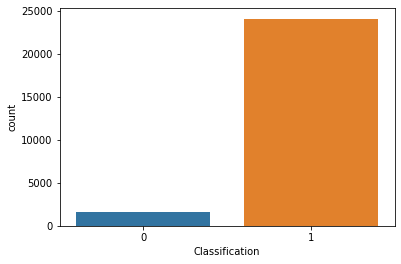

In [29]:
firsttimemerchantuser_1 = val_data[val_data['FirstTimeMerchantUser']==1]
firsttimemerchantuser_1['Predicted_values']=[1 if x>=0.5 else 0 for x in firsttimemerchantuser_1['Probability']]
firsttimemerchantuser_1['Classification'] = [1 if x==y else 0 for x,y in 
                                     zip(firsttimemerchantuser_1['Predicted_values'],firsttimemerchantuser_1['Target'])]
sns.countplot(firsttimemerchantuser_1['Classification'])

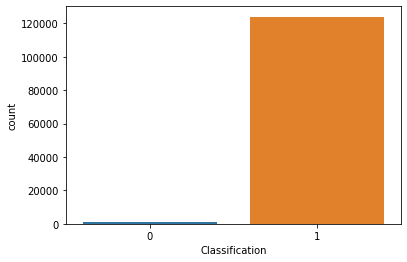

In [30]:
firsttimemerchantuser_0 = val_data[val_data['FirstTimeMerchantUser']==0]
firsttimemerchantuser_0['Predicted_values']=[1 if x>=0.5 else 0 for x in firsttimemerchantuser_0['Probability']]
firsttimemerchantuser_0['Classification'] = [1 if x==y else 0 for x,y in 
                                     zip(firsttimemerchantuser_0['Predicted_values'],firsttimemerchantuser_0['Target'])]
sns.countplot(firsttimemerchantuser_0['Classification'])

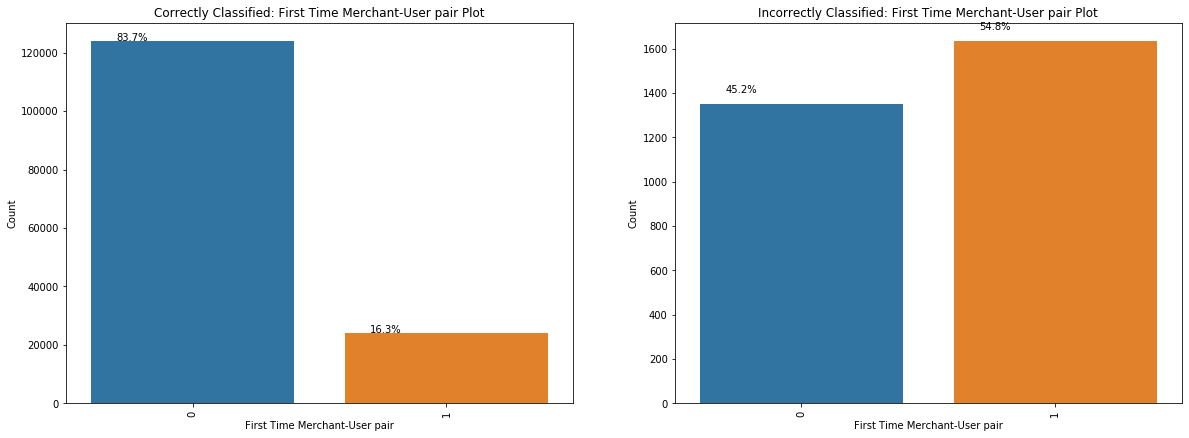

In [31]:
#First time Merchant-User pair
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
plt.subplot(121)
ax1 = sns.countplot(correct['FirstTimeMerchantUser'])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
total = len(correct['FirstTimeMerchantUser'])
for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x()+0.1, p.get_height()+50))

plt.xlabel('First Time Merchant-User pair')
plt.ylabel('Count')
plt.title('Correctly Classified: First Time Merchant-User pair Plot')

plt.subplot(122)

ax2 = sns.countplot(incorrect['FirstTimeMerchantUser'])
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
total = len(incorrect['FirstTimeMerchantUser'])
for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x()+0.1, p.get_height()+50))
        
plt.xlabel('First Time Merchant-User pair')
plt.ylabel('Count')
plt.title('Incorrectly Classified: First Time Merchant-User pair Plot')

plt.show()

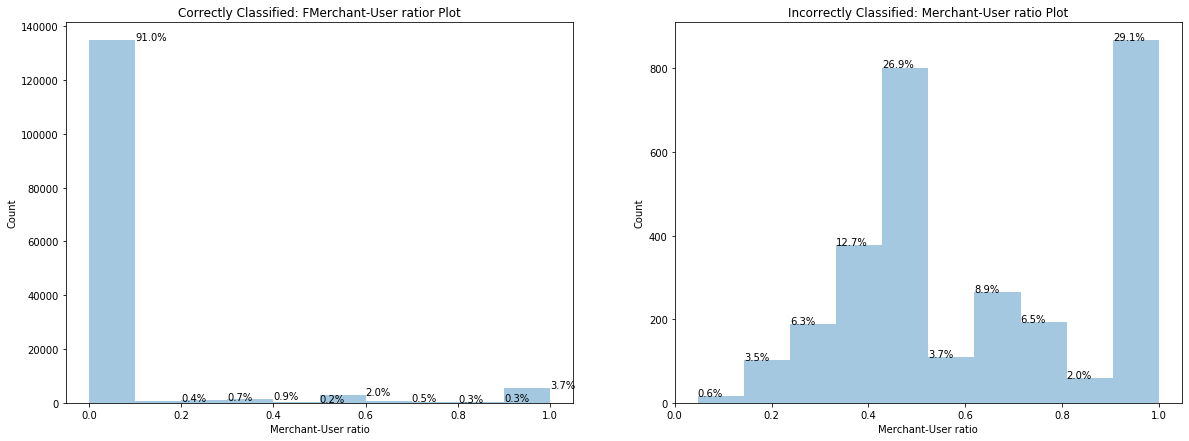

In [32]:
#Merchant-User ratio
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
plt.subplot(121)
ax1 = sns.distplot(correct['User_Merchant_Ratio'],kde=False,bins=10)
total = len(correct['User_Merchant_Ratio'])
for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x()+0.1, p.get_height()+50))

plt.xlabel('Merchant-User ratio')
plt.ylabel('Count')
plt.title('Correctly Classified: FMerchant-User ratior Plot')

plt.subplot(122)

ax2 = sns.distplot(incorrect['User_Merchant_Ratio'],kde=False,bins=10)
total = len(incorrect['User_Merchant_Ratio'])
for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x(), p.get_height()))
        
plt.xlabel('Merchant-User ratio')
plt.ylabel('Count')
plt.title('Incorrectly Classified: Merchant-User ratio Plot')

plt.show()

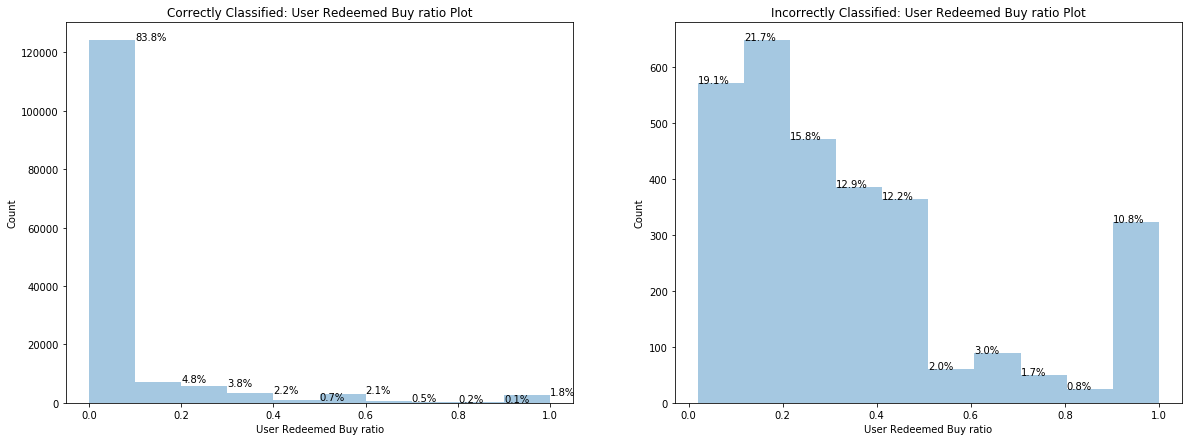

In [33]:
#User Redeemed Buy ratio
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
plt.subplot(121)
ax1 = sns.distplot(correct['User_Redeemed_Buy'],kde=False,bins=10)
total = len(correct['User_Redeemed_Buy'])
for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x()+0.1, p.get_height()+50))

plt.xlabel('User Redeemed Buy ratio')
plt.ylabel('Count')
plt.title('Correctly Classified: User Redeemed Buy ratio Plot')

plt.subplot(122)

ax2 = sns.distplot(incorrect['User_Redeemed_Buy'],kde=False,bins=10)
total = len(incorrect['User_Redeemed_Buy'])
for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x(), p.get_height()))
        
plt.xlabel('User Redeemed Buy ratio')
plt.ylabel('Count')
plt.title('Incorrectly Classified: User Redeemed Buy ratio Plot')

plt.show()

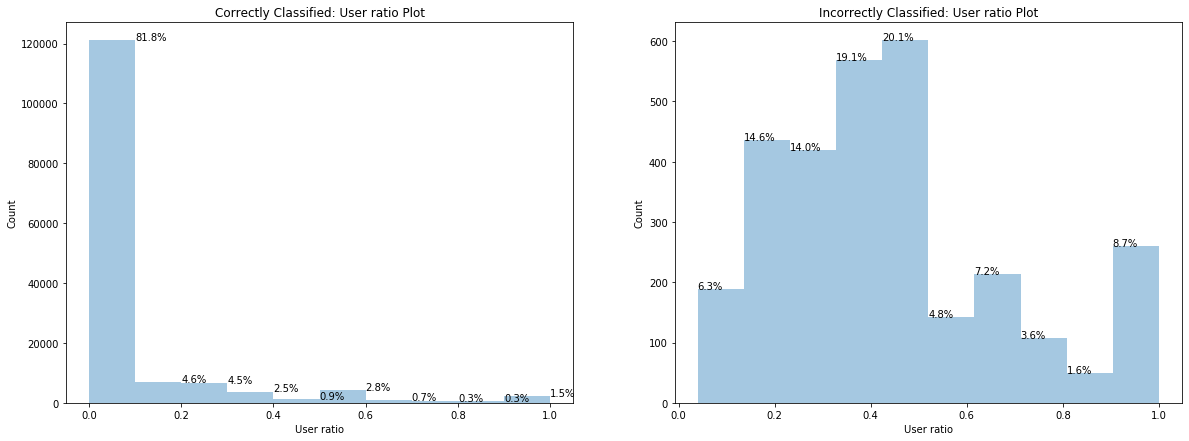

In [34]:
#User ratio
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
plt.subplot(121)
ax1 = sns.distplot(correct['User_Ratio'],kde=False,bins=10)
total = len(correct['User_Ratio'])
for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x()+0.1, p.get_height()+50))

plt.xlabel('User ratio')
plt.ylabel('Count')
plt.title('Correctly Classified: User ratio Plot')

plt.subplot(122)

ax2 = sns.distplot(incorrect['User_Ratio'],kde=False,bins=10)
total = len(incorrect['User_Ratio'])
for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x(), p.get_height()))
        
plt.xlabel('User ratio')
plt.ylabel('Count')
plt.title('Incorrectly Classified: User ratio Plot')

plt.show()

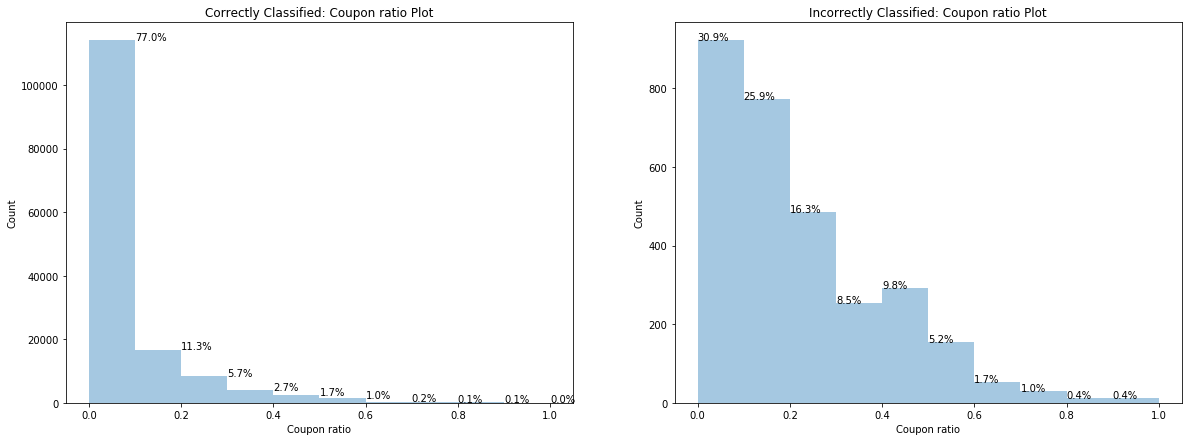

In [35]:
#Coupon ratio
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,7))
plt.subplot(121)
ax1 = sns.distplot(correct['Coupon_Ratio'],kde=False,bins=10)
total = len(correct['Coupon_Ratio'])
for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x()+0.1, p.get_height()+50))

plt.xlabel('Coupon ratio')
plt.ylabel('Count')
plt.title('Correctly Classified: Coupon ratio Plot')

plt.subplot(122)

ax2 = sns.distplot(incorrect['Coupon_Ratio'],kde=False,bins=10)
total = len(incorrect['Coupon_Ratio'])
for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x(), p.get_height()))
        
plt.xlabel('Coupon ratio')
plt.ylabel('Count')
plt.title('Incorrectly Classified: Coupon ratio Plot')

plt.show()

## Test Data Scores

ROC AUC Score of Probailities:  0.996
ROC AUC Curve


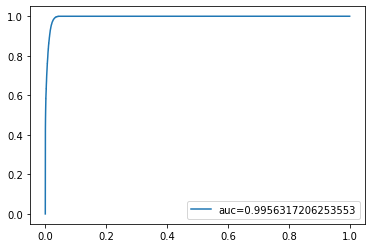

______________________________________________________________________

 The classification report for the model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    142942
           1       0.83      0.87      0.85      9367

    accuracy                           0.98    152309
   macro avg       0.91      0.93      0.92    152309
weighted avg       0.98      0.98      0.98    152309

______________________________________________________________________

 The confusion matrix for the model:
[[141264   1678]
 [  1234   8133]]
______________________________________________________________________


,User_id,Merchant_id,Date_received,Probability
715091,5193451,7555,2016-04-16,0.000002
936313,6788567,3527,2016-03-22,0.000003
935861,6785479,450,2016-02-02,0.000002
73628,536792,1375,2016-05-13,0.000002
810548,5882244,4860,2016-02-07,0.000002


In [36]:
test_output, test_data = evaluate_model(X_test, y_test)
test_output.head()

In [45]:
def training2(train_dataset):
    y = y_train
    X = X_train[features]
    data_dmatrix = xgb.DMatrix(data=X, label=y)
    params =  {'objective':'binary:logistic','colsample_bytree':0.8,'learning_rate':0.1,
                'max_depth':5,'n_estimators':500,'scale_pos_weight':1,'colsample_bytree':0.8,
               'min_child_weight':5,' subsample':0.8, 'alpha':0.2, 'gamma':1}
    

    cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,num_boost_round=50,
                        early_stopping_rounds=10, as_pandas=True, seed=410,  metrics='auc') 
    return cv_results
    
training2(train_dataset)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.978774,0.000159,0.978501,0.000371
1,0.991780,0.000104,0.991603,0.000266
2,0.992683,0.000832,0.992521,0.000757
3,0.993258,0.000332,0.993130,0.000298
4,0.993543,0.000163,0.993427,0.000196
5,0.993627,0.000106,0.993521,0.000265
6,0.993743,0.000058,0.993628,0.000229
7,0.993734,0.000085,0.993616,0.000276
8,0.993790,0.000093,0.993671,0.000262
9,0.993812,0.000072,0.993691,0.000215


# Test Dataset and Submission File

In [46]:
predictions = (model.predict_proba(test_dataset[features])[:,1]).tolist()
predicted_values = (model.predict(test_dataset[features])).tolist()
test = pd.merge(test_dataset[features], test_dataset[['User_id','Merchant_id','Date_received']]
                , how='left',left_index=True,right_index=True)
test['Probability'] = [round(i, 6) for i in predictions]
output = test[['User_id','Merchant_id','Date_received','Probability']]

output

,User_id,Merchant_id,Date_received,Probability
0,4129537,450,2016-07-12,0.000002
1,6949378,1300,2016-07-06,0.000025
2,2166529,7113,2016-07-27,0.000002
3,2166529,7113,2016-07-27,0.000001
4,6172162,7605,2016-07-08,0.000009
...,...,...,...,...
113635,5828093,5717,2016-07-16,0.000005
113636,6626813,1699,2016-07-07,0.000012
113637,6626813,7321,2016-07-12,0.000015
113638,4547069,760,2016-07-17,0.000012


In [39]:
output.to_csv('OutputFile.csv',index=False) 


# Execution Time of this notebook

In [40]:
later = time.time()
difference = later - now
print('Time taken for the execution of this notebook: '+str(round(difference/60,2))+' mins')

Time taken for the execution of this notebook: 8.33 mins
